In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Uploading Data

In [2]:
from keras.datasets import mnist
(train_x, train_y),(test_x, test_y)=mnist.load_data()
flatten=keras.layers.Flatten()
inp_x=flatten(train_x.astype('float32'))/255
inp_y=train_y.astype('float32')

Display function

In [3]:
def show(data,n):
    plt.figure(figsize=(10,6))
    for i in range(1,n*n):
        ax=plt.subplot(n,n,i)
        plt.xticks(ticks=[],labels='')
        plt.yticks(ticks=[],labels='')
        ax.imshow(data[i].reshape(28,28),cmap='gray')

Initializing parameters of the model

In [4]:
hidden_nodes=[256,128,32,128,256]
input_shape=784
batch_size=50

In [5]:
class Autoencoder:
    def __init__(self):
        
        self.hidden=hidden_nodes
        self.inp_shape=input_shape
        self.lr=tf.Variable(0.01,trainable=False)
        
        self.en1=keras.layers.Dense(self.hidden[0],activation='sigmoid',\
                                name='Encoding_layer_1',trainable=True,input_shape=(self.inp_shape,))
        self.en2=keras.layers.Dense(self.hidden[1],activation='sigmoid',\
                                    name='Encoding_layer_2',trainable=True)
        self.de1=keras.layers.Dense(self.hidden[3],activation='sigmoid',input_shape=(self.hidden[2],)\
                                    ,trainable=True,name='Decoding_layer_1')
        self.de2=keras.layers.Dense(self.hidden[4],activation='sigmoid',trainable=True\
                              ,name='Decoding_layer_2')
        self.cod=keras.layers.Dense(self.hidden[2],activation='relu',trainable=True\
                                    ,name='Coding_layer')
        self.final=keras.layers.Dense(self.inp_shape,name='Output_layer')

        self.encoder=keras.Sequential(name="encoder")
        self.encoder.add(self.en1)
        self.encoder.add(self.en2)
        self.encoder.add(self.cod)
        self.decoder=keras.Sequential(name="decoder")
        self.decoder.add(self.de1)
        self.decoder.add(self.de2)
        self.decoder.add(self.final)
        
        self.opt=keras.optimizers.RMSprop(self.lr)
        self.reconstructor=keras.Sequential()
        self.reconstructor.add(self.encoder)
        self.reconstructor.add(self.decoder)
        self.reconstructor.summary()
        
    def train(self, datapoint):
        with tf.GradientTape() as tape:
            output=self.reconstructor(datapoint)
            loss=tf.reduce_mean(tf.keras.losses.mean_squared_error(datapoint,output))
        grads=tape.gradient(loss,self.reconstructor.trainable_variables)
        self.opt.apply_gradients(zip(grads,self.reconstructor.trainable_variables))
        return loss
                
    def fit(self, data, batch_size, epochs):
        batch_len=len(data)//batch_size
        for i in range(1,epochs+1):
            print(f'Epoch===> {i}')
            for j in range(0,batch_len):
                inp=data[j:j+batch_size]
                loss=self.train(inp)
                
                if (j%100==0) and (j>1):
                    print(f'Loss of batch {j} ----> {loss}')
        
    def predict(self,dat_point):
        return self.reconstructor(dat_point)
    
    def encode(self,dat_point):
        return self.encoder(dat_point)
    
    def decode(self,dat_point):
        return self.decoder(dat_point)

In [6]:
mod=Autoencoder()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 32)                237984    
_________________________________________________________________
decoder (Sequential)         (None, 784)               238736    
Total params: 476,720
Trainable params: 476,720
Non-trainable params: 0
_________________________________________________________________


In [7]:
mod.fit(inp_x,256,20)

Epoch===> 1
Loss of batch 100 ----> 0.06264566630125046
Loss of batch 200 ----> 0.05830086022615433
Epoch===> 2
Loss of batch 100 ----> 0.047615885734558105
Loss of batch 200 ----> 0.03874041885137558
Epoch===> 3
Loss of batch 100 ----> 0.03886304423213005
Loss of batch 200 ----> 0.03498753160238266
Epoch===> 4
Loss of batch 100 ----> 0.033982910215854645
Loss of batch 200 ----> 0.028656717389822006
Epoch===> 5
Loss of batch 100 ----> 0.028709426522254944
Loss of batch 200 ----> 0.023060392588377
Epoch===> 6
Loss of batch 100 ----> 0.021195974200963974
Loss of batch 200 ----> 0.019852012395858765
Epoch===> 7
Loss of batch 100 ----> 0.01727963238954544
Loss of batch 200 ----> 0.015636269003152847
Epoch===> 8
Loss of batch 100 ----> 0.014448034577071667
Loss of batch 200 ----> 0.013465424068272114
Epoch===> 9
Loss of batch 100 ----> 0.0118031557649374
Loss of batch 200 ----> 0.011637147516012192
Epoch===> 10
Loss of batch 100 ----> 0.010508942417800426
Loss of batch 200 ----> 0.010600721

Reconstructing the input data 

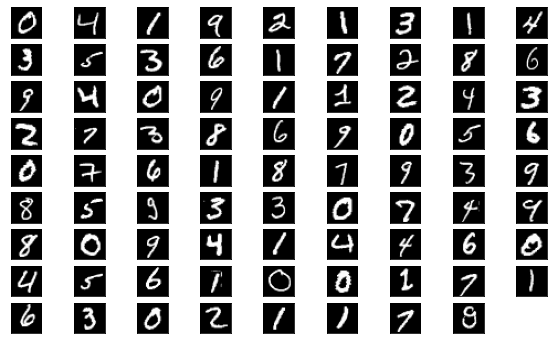

In [8]:
show(inp_x.numpy(),9)

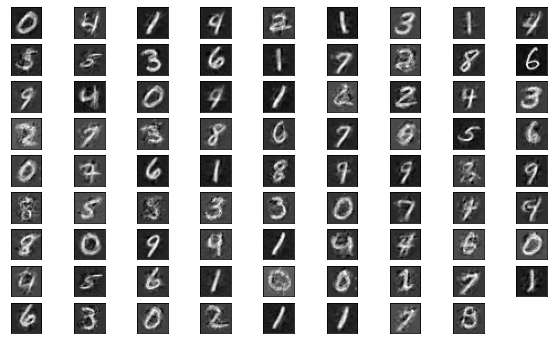

In [9]:
recon=mod.predict(inp_x[0:100,])
show(recon.numpy(),9)

Testing the efficacy with unseen cases

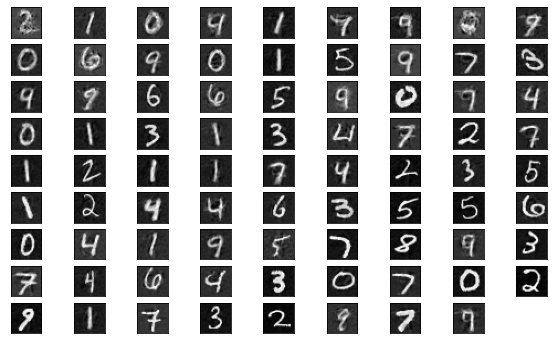

In [10]:
test=test_x.astype('float32')/255
test=flatten(test)

e=mod.encode(test)
d=mod.decode(e)

show(d.numpy(),9)

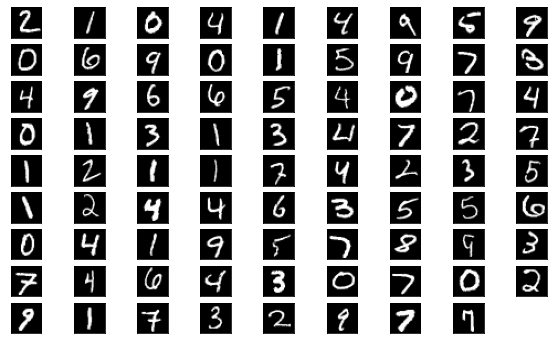

In [11]:
show(test.numpy(),9)